In [195]:
from google.colab import files

uploaded = files.upload()

Saving boilingpoints.csv to boilingpoints.csv


In [196]:
pip install rdkit-pypi

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from sklearn.preprocessing import OneHotEncoder


df=pd.read_csv("boilingpoints.csv")
df=df.dropna(how="all")
df=df.iloc[:,:3]
df["Nomenclature Name"]=df.iloc[:,2]
df["Molecular Structure"]=df.iloc[:,1]
df["CMC"]=df.iloc[:,0]
df=df[["Nomenclature Name","Molecular Structure","CMC"]]
df.tail(10)

,Nomenclature Name,Molecular Structure,CMC
59,A,C=CC(=C)C=C-C=C-C=CCCCCSSSNSOCOCOCSSSCCC,1261.0
60,A,C=CC(=C)C=C-C=C-C=CCCCCSSSNSOCOCOCSSSCCCSSS,1462.0
61,A,C=CC(=C)C=C-C=C,376.0
62,A,C=CC(=C)C=C-C=C-S,447.0
63,A,C=CC(=C)C=C-C=C-S-S,515.0
64,A,C=CC(=C)C=C-C=C-S-S-CCCO,682.0
65,A,C=CC(=C)C=C-C=C-S-S-CCCOCCC,681.0
66,A,C=CC(=C)C=C-C=C-S-S-CCCOCCCOOO,818.0
67,A,C=CC(=C)C=C-C=C-S-S-CCCOCCCOOOCCC,817.0
68,A,C=CC(=C)C=N,391.0


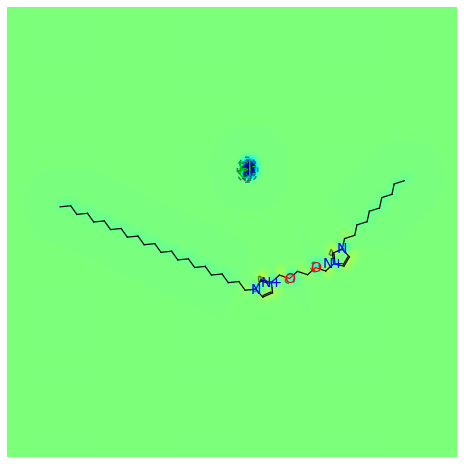

In [199]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('CCCCCCCCCCCCCCCCCCCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCCCCCCC)C=C2)=C1.[Cl-].[Cl-]')
AllChem.ComputeGasteigerCharges(mol)
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)
AllChem.ComputeGasteigerCharges(mol)



In [200]:
def encoding(df):
  encoded=[]
  elements=[['c'], ['n'], ['o'], ['C'], ['N'], ['F'], ['='], ['O'], 
            ['('], [')'], ['1'],['2'],['#'],['Cl'],['/']]
  enc = OneHotEncoder(handle_unknown='ignore')
  enc.fit(elements)
  enc.categories_
  df1=df["Molecular Structure"].apply(lambda x: pd.Series(list(x)))
  for i in range(df1.shape[0]):
    x=enc.transform(pd.DataFrame(df1.iloc[i,:]).dropna(how="all").values).toarray()
    y=np.zeros(((df1.shape[1]-x.shape[0]),len(elements)))
    encoded.append(np.vstack((x,y)))
  return encoded

def encoded_generate_images(df):
  listt=encoding(df)
  plt.figure(figsize=(20,100))
  for i in range(len(listt)):
    plt.subplot(len(listt),5,i+1)
    plt.imshow(listt[i])

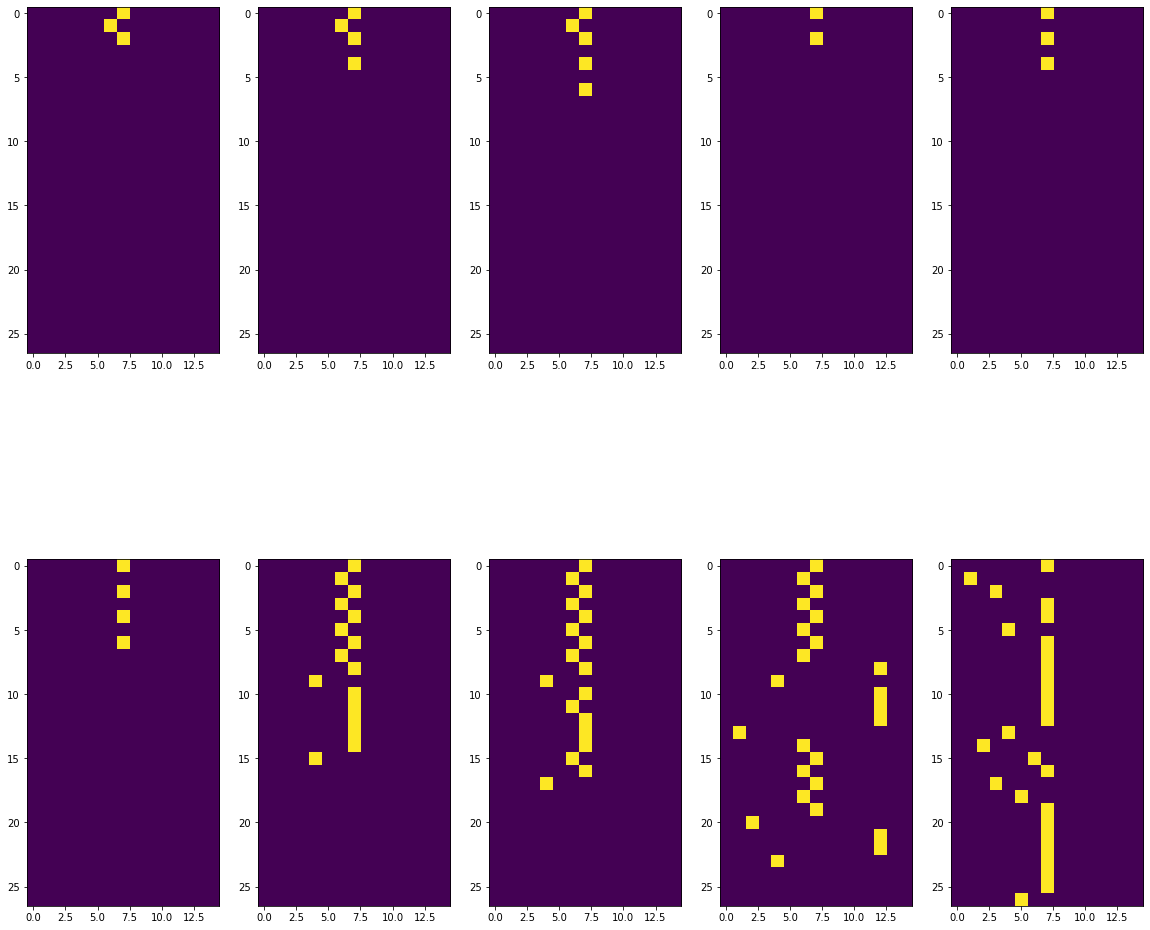

In [201]:
encoded_generate_images(df.head(10))

In [202]:
import keras
from keras.models import Sequential
from keras.layers import Dense,MaxPool2D,Conv2D,Conv1D,Flatten,MaxPooling1D
from keras import optimizers
from keras.layers import Dropout

In [203]:
X=encoding(df)
X=np.array(X)
X.shape

(69, 43, 15)

In [204]:
Y=df["CMC"].values
Y.shape

(69,)

In [205]:
import tensorflow as tf

In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=8, activation='relu',kernel_regularizer="l2", input_shape=(43, 15)))
model.add(MaxPooling1D(pool_size=5))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
optimizer=tf.keras.optimizers.Adam(lr=0.005)
model.compile(optimizer=optimizer, loss='mean_absolute_error')
Model=model.fit(x=X_train,y=y_train,epochs=50,batch_size=16,validation_split=0.2)
  


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



4/4 [==============================] - 2s 105ms/step - loss: 607.4653 - val_loss: 592.7061
Epoch 2/50
4/4 [==============================] - 0s 23ms/step - loss: 598.0173 - val_loss: 574.4332
Epoch 3/50
4/4 [==============================] - 0s 32ms/step - loss: 574.6552 - val_loss: 536.3997
Epoch 4/50
4/4 [==============================] - 0s 21ms/step - loss: 530.3219 - val_loss: 470.4543
Epoch 5/50
4/4 [==============================] - 0s 18ms/step - loss: 453.0748 - val_loss: 366.8500
Epoch 6/50
4/4 [==============================] - 0s 46ms/step - loss: 332.6377 - val_loss: 214.5169
Epoch 7/50
4/4 [==============================] - 0s 20ms/step - loss: 170.7353 - val_loss: 137.4010
Epoch 8/50
4/4 [==============================] - 0s 26ms/step - loss: 124.6861 - val_loss: 156.9900
Epoch 9/50
4/4 [==============================] - 0s 46ms/step - loss: 123.8117 - val_loss: 139.4502
Epoch 10/50
4/4 [==============================] - 0s 20ms/step - loss: 102.4787 - val_loss: 122.4483

In [208]:
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 36, 128)           15488     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 7, 128)           0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 7, 128)            0         
                                                                 
 flatten_6 (Flatten)         (None, 896)               0         
                                                                 
 dense_33 (Dense)            (None, 50)                44850     
                                                                 
 dense_34 (Dense)            (None, 1)                 51        
                                                     

In [209]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)
MAE_test=abs(y_predtest.reshape(y_test.shape)-y_test).sum()/y_test.shape
MAE_train=abs(y_predtrain.reshape(y_train.shape)-y_train).sum()/y_train.shape
print("Mean Absolute Error on Training Set = ",MAE_train.item())
print("Mean Absolute Error on Test Set = ",MAE_test.item())

Mean Absolute Error on Training Set =  42.50958911526588
Mean Absolute Error on Test Set =  65.2058846609933


(7,)

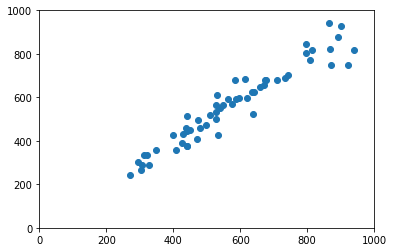

In [211]:
import matplotlib.pyplot as plt
plt.scatter(y_predtrain,y_train.reshape(62,1))
plt.xlim([0,1000])
plt.ylim([0,1000])
y_train.shape
y_test.shape


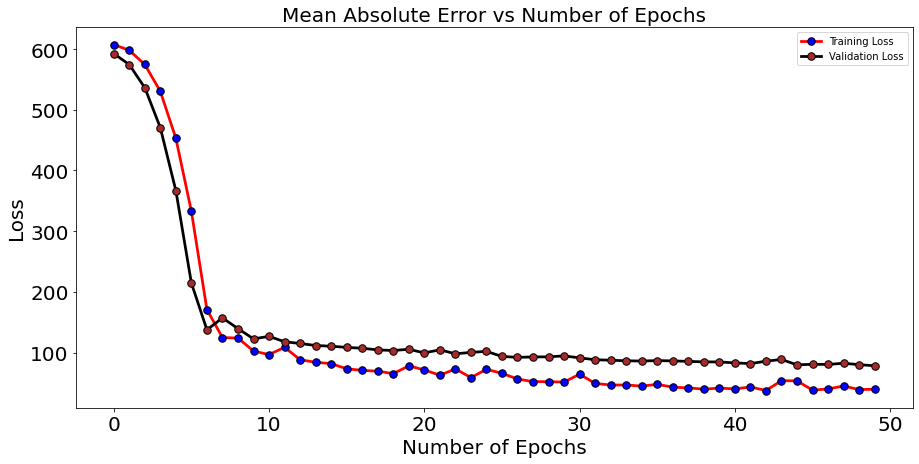

In [212]:
plt.figure(figsize=(15,7))
plt.plot(Model.history["loss"],color='r', linewidth=2.75, linestyle='-', marker='.', markersize=15,markerfacecolor='b',
         markeredgecolor='black',
         markeredgewidth=1,label="Training Loss")
plt.plot(Model.history['val_loss'],color='black', linewidth=2.75, linestyle='-', marker='.', markersize=15,markerfacecolor='brown',
         markeredgecolor='black',
         markeredgewidth=1,label="Validation Loss")
plt.xlabel("Number of Epochs",size=20,color="black")
plt.ylabel("Loss",size=20,color="black")
plt.xticks(size=20)
plt.yticks(size=20)
plt.title("Mean Absolute Error vs Number of Epochs",size=20)
plt.legend()
plt.show()

In [217]:
from google.colab import files

uploaded = files.upload()

Saving boilingpointest.csv to boilingpointest (1).csv


In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from sklearn.preprocessing import OneHotEncoder


df=pd.read_csv("boilingpointest (1).csv")
df=df.dropna(how="all")
df=df.iloc[:,:3]
df["Nomenclature Name"]=df.iloc[:,2]
df["Molecular Structure"]=df.iloc[:,1]
df["CMC"]=df.iloc[:,0]
df=df[["Nomenclature Name","Molecular Structure","CMC"]]
df.head(10)

,Nomenclature Name,Molecular Structure,CMC
0,A,C(/CC1CCCCCCC1)=C/2CCCCCCC2,679.0
1,A,CCCC/C=C\1CCCCCCC1,536.0
2,A,C=CC2CCC(C1CCCC1)C2,496.7
3,A,C=CC2CCC(C1CCCC1)C2=C,518.0
4,A,C=CC2CCC(C1CCCC1)C2=C-C,549.0
5,A,C=CC2CCC(C1CCCC1)C2=C-C=C,568.0
6,A,C=CC2CCC(C1CCCC1)C2=C-C=C-C,599.0
7,A,C=CC2CCC(C1CCCCC1)C2=C-C=C-C,626.0
8,A,C=CC2CCC(C1CCCCC1)C2=C-C=C-C-C,649.0
9,A,C=CC2CCC(C1CCCCC1)C2=C-C=C-C-C=C,668.0


In [219]:
X=encoding(df)
X=np.array(X)
X.shape

(16, 43, 15)

In [220]:
y_predtrain=model.predict(X)

In [221]:
y_predtrain

array([[ 675.0674 ],
       [ 477.48685],
       [ 473.0284 ],
       [ 508.43268],
       [ 538.24457],
       [ 576.7953 ],
       [ 620.13654],
       [ 633.77563],
       [ 659.6441 ],
       [ 745.80054],
       [ 870.3603 ],
       [ 922.1    ],
       [1170.523  ],
       [1170.523  ],
       [1217.1638 ],
       [1217.1638 ]], dtype=float32)

### Neural Network using Bond Features

In [ ]:
mw={"C":12,"c":12,"O":16,"o":16,"N":14,"F":19}
def Molecular_Weight(text):
  Mass=[]
  for elements in text:
    if elements=="C":
      Mass.append(mw[elements])
    elif elements=="c":
      Mass.append(mw[elements])
    elif elements=="o":
      Mass.append(mw[elements])
    elif elements=="O":
      Mass.append(mw[elements])
    elif elements=="F":
      Mass.append(mw[elements])
    elif elements=="N":
      Mass.append(mw[elements])  
  return sum(Mass)

In [ ]:
df["C_Atoms_Ring"]=df["Molecular Structure"].apply(lambda x: x.count('c'))
df["C_Atoms_Chain"]=df["Molecular Structure"].apply(lambda x: x.count('C'))
df["O_Atoms_Chain"]=df["Molecular Structure"].apply(lambda x: x.count('O'))
df["O_Atoms_Ring"]=df["Molecular Structure"].apply(lambda x: x.count('o'))
df["N_Double Bonds_Ring"]=df["Molecular Structure"].apply(lambda x: x.count('c')/2)
df["N_Double Bonds_Chain"]=df["Molecular Structure"].apply(lambda x: x.count('='))
df["Nitrogen_Atoms"]=df["Molecular Structure"].apply(lambda x: x.count('N'))
df["F_Atoms"]=df["Molecular Structure"].apply(lambda x: x.count('F'))
df["MW"]=df["Molecular Structure"].apply(lambda x: Molecular_Weight(x))
df["Total Number of Atoms"]=df["Molecular Structure"].apply(lambda x: len(x))
df["Number of Single Bonds"]=df["Molecular Structure"].apply(lambda x:len(x)-x.count('=')-1)

In [ ]:
df.head()

,Nomenclature Name,Molecular Structure,CMC,C_Atoms_Ring,C_Atoms_Chain,O_Atoms_Chain,O_Atoms_Ring,N_Double Bonds_Ring,N_Double Bonds_Chain,Nitrogen_Atoms,F_Atoms,MW,Total Number of Atoms,Number of Single Bonds
0,1,CCN1C=C[N+](COCCOC[N+]2=CN(CC)C=C2)=C1.[Cl- ]....,2.23,0,16,2,0,0.0,4,4,0,280,51,46
1,1,CCCCN1C=C[N+](COCCOC[N+]2=CN(CCCC)C=C2)=C1. [C...,2.41,0,20,2,0,0.0,4,4,0,328,55,50
2,1,CCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCCC)C=C 2)=C...,2.58,0,24,2,0,0.0,4,4,0,376,59,54
3,1,CCCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCCCC)C =C2)...,2.65,0,26,2,0,0.0,4,4,0,400,61,56
4,1,CCCCCCCCN1C=C[N+](COCCOC[N+]2=CN(CCCCCCCC )C=C...,2.72,0,28,2,0,0.0,4,4,0,424,63,58


In [ ]:
X=df.loc[:,"MW":]
Y=df[["CMC"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(69, 3)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(55, 1)

In [ ]:
model = Sequential()
model.add(Dense(40, input_dim=3, activation="relu",kernel_regularizer="l2"))
#model.add(Dense(20,activation="relu",kernel_regularizer="l2"))
model.add(Dense(10,activation="relu",kernel_regularizer="l2"))
#model.add(Dense(12, activation="relu",kernel_regularizer="l2"))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 40)                160       
                                                                 
 dense_27 (Dense)            (None, 10)                410       
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer=tf.keras.optimizers.Adam(lr=0.09)
model.compile(optimizer=optimizer, loss='mean_absolute_error')
Model=model.fit(x=X_train,y=y_train,epochs=50,batch_size=64,validation_split=0.1)
  

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



1/1 [==============================] - 1s 645ms/step - loss: 3.5846 - val_loss: 2.0574
Epoch 2/50
1/1 [==============================] - 0s 28ms/step - loss: 2.1729 - val_loss: 0.9313
Epoch 3/50
1/1 [==============================] - 0s 32ms/step - loss: 1.4268 - val_loss: 1.8465
Epoch 4/50
1/1 [==============================] - 0s 28ms/step - loss: 1.7640 - val_loss: 1.1003
Epoch 5/50
1/1 [==============================] - 0s 29ms/step - loss: 1.1344 - val_loss: 0.4830
Epoch 6/50
1/1 [==============================] - 0s 30ms/step - loss: 0.7610 - val_loss: 0.5357
Epoch 7/50
1/1 [==============================] - 0s 33ms/step - loss: 0.6210 - val_loss: 0.4203
Epoch 8/50
1/1 [==============================] - 0s 29ms/step - loss: 0.4344 - val_loss: 0.3925
Epoch 9/50
1/1 [==============================] - 0s 33ms/step - loss: 0.4088 - val_loss: 0.3842
Epoch 10/50
1/1 [==============================] - 0s 32ms/step - loss: 0.3716 - val_loss: 0.3871
Epoch 11/50
1/1 [======================

In [ ]:
y_predtrain=model.predict(X_train)
y_predtest=model.predict(X_test)
print("Train Error = ",abs(y_predtrain.reshape(55)-y_train.values.reshape(55)).sum()/55)
print("Unseen Test Error = ",abs(y_predtest.reshape(14)-y_test.values.reshape(14)).sum()/14)

Train Error =  0.0845192182714289
Unseen Test Error =  0.18205557482583187


In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scattergl(
    x = y_predtrain.reshape(55),
    y = y_train.values.reshape(55),
    mode='markers',
    marker=dict(
        color=np.random.randn(14),
        colorscale='Viridis',
        line_width=2
    )
))

fig.show()

In [ ]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scattergl(
    x = y_predtest.reshape(14),
    y = y_test.values.reshape(14),
    mode='markers',
    marker=dict(
        color=np.random.randn(55),
        colorscale='Viridis',
        line_width=2
    )
))

fig.show()

In [ ]:
from urllib.request import urlopen
from urllib.parse import quote

def CIRconvert(ids):
    try:
        url = 'http://cactus.nci.nih.gov/chemical/structure/' + quote(ids) + '/smiles'
        ans = urlopen(url).read().decode('utf8')
        return ans
    except:
        return 'Did not work'

identifiers  = ['Nevirapine', 'CTAB', 'Diethylsulfate', 'Diethyl sulfate', '50-78-2', 'Adamant']

for ids in identifiers :
    print(ids, CIRconvert(ids))

Nevirapine Cc1ccnc2N(C3CC3)c4ncccc4C(=O)Nc12
CTAB [Br-].CCCCCCCCCCCCCCCC[N+](C)(C)C
Diethylsulfate CCO[S](=O)(=O)OCC
Diethyl sulfate CCO[S](=O)(=O)OCC
50-78-2 CC(=O)Oc1ccccc1C(O)=O
Adamant Did not work


In [ ]:
filename = open("inif.txt", "r")

for line in filename :
    event = line
    compounds = pcp.get_compounds(event, namespace='smiles') 
    match = compounds[0]
    print(i,'$$$','the CID is',compounds,'$$$','The IUPAC name is',match.iupac_name,'$$$','for the SMILE',event)
    i+=1

FileNotFoundError: ignored